<h2><center> Welcome to the Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [1]:
!pip -q install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [2]:
SEED = 42
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [3]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [4]:
# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [5]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [6]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [7]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

In [8]:
var_def = pd.read_csv('Variable_Definitions.csv')
var_def

,Feature,Description
0,I/O Data Operations,Speed at which the process is issuing read and...
1,I/O Data Bytes,Speed at which the process is reading and writ...
2,Number of subprocesses,Number of sub-processes that are currently act...
3,Time on processor,"The total time, in seconds, that a process has..."
4,Disk Reading/sec,Speed of disk reading operations
5,Disc Writing/sec,Speed of writing operations to disk
6,Confirmed byte radius,The ratio of Memory/Bytes committed and Memory...
7,Pages Read/sec,Speed rate at which the disk was read in order...
8,Pages Input/sec,Speed at which pages are written to disk to fr...
9,Page Errors/sec,This is the average number of pages with fault...


<a name="Statistics"></a>
## 3. Statistical Summaries

In [9]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [10]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [11]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

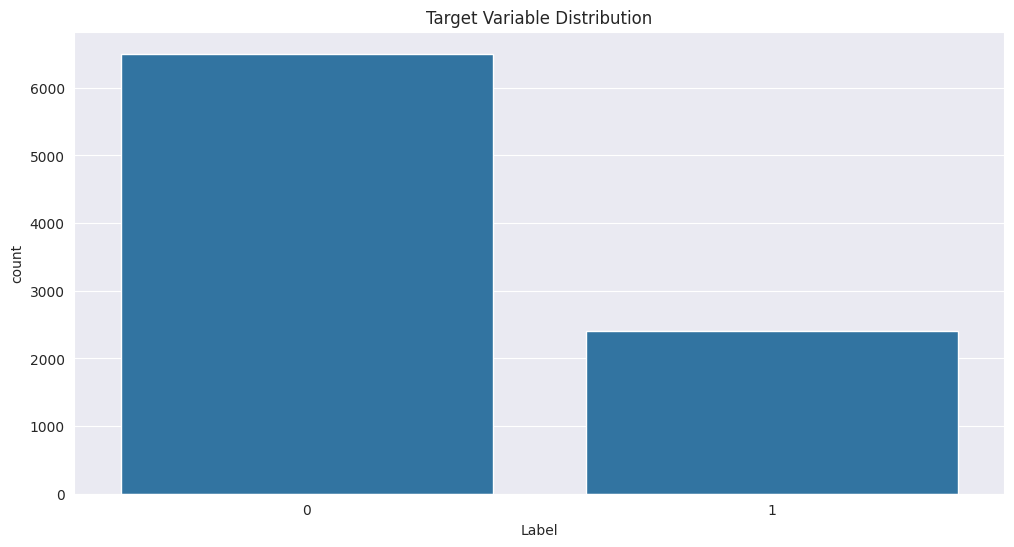

In [12]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

In [13]:
train['Label'].value_counts()

,count
Label,
0,6504
1,2404


There is a class imbalance in our dataset

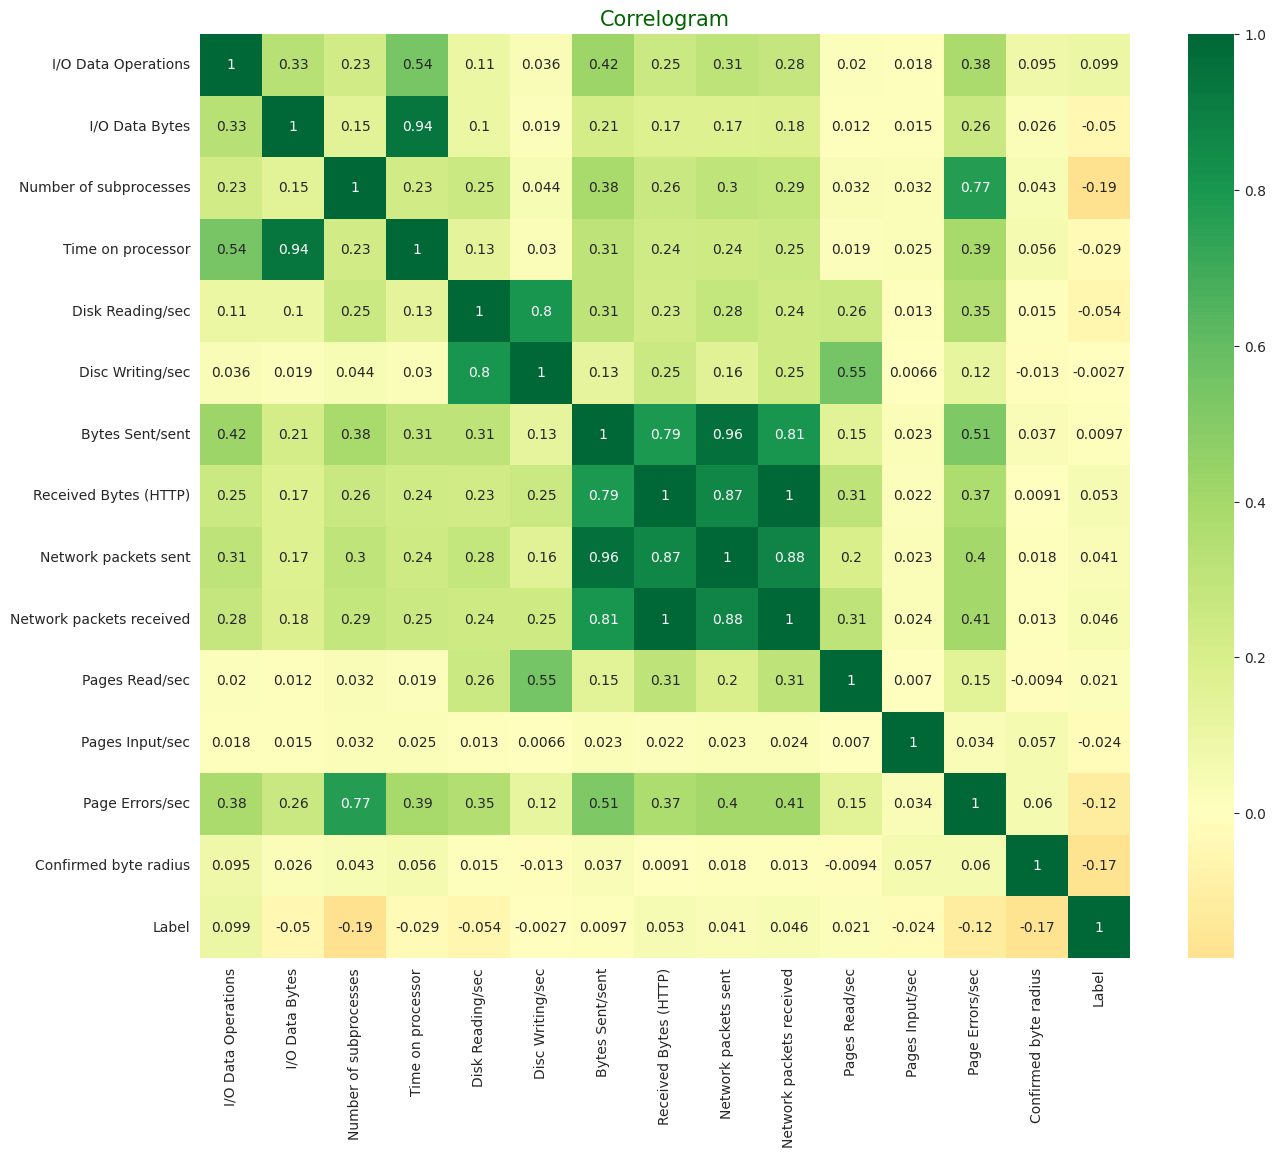

In [14]:
# Plotting a heatmap to show correlations between variables
corr = train.drop("ID",axis=1).corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target


# 6. Features Engineering

In [15]:
var_def

,Feature,Description
0,I/O Data Operations,Speed at which the process is issuing read and...
1,I/O Data Bytes,Speed at which the process is reading and writ...
2,Number of subprocesses,Number of sub-processes that are currently act...
3,Time on processor,"The total time, in seconds, that a process has..."
4,Disk Reading/sec,Speed of disk reading operations
5,Disc Writing/sec,Speed of writing operations to disk
6,Confirmed byte radius,The ratio of Memory/Bytes committed and Memory...
7,Pages Read/sec,Speed rate at which the disk was read in order...
8,Pages Input/sec,Speed at which pages are written to disk to fr...
9,Page Errors/sec,This is the average number of pages with fault...


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [17]:
X = train.drop(columns=['ID','Label'])
y = train['Label']

In [18]:
list(X.columns)

['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

In [19]:
# Creation of pertinent new features
for data in [X, test]:
  data['IO_Ratio'] = data[' I/O Data Bytes'] / (data['I/O Data Operations'] + 1e-5)
  data['Disk_IO_Ratio'] = data['Disk Reading/sec'] / (data['Disc Writing/sec'] + 1e-5)
  data['Network_Packet_Ratio'] = data['Network packets sent'] / (data['Network packets received'] + 1e-5)
  data['HTTP_Byte_Ratio'] = data['Bytes Sent/sent'] / (data['Received Bytes (HTTP)'] + 1e-5)

In [20]:
len(X.columns)

18

<a name="Preprocess"></a>
## 7. Modeling

In [21]:
# split train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

In [22]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6681, 18), (2227, 18), (6681,), (2227,))

In [23]:
X_train.head(3)

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,IO_Ratio,Disk_IO_Ratio,Network_Packet_Ratio,HTTP_Byte_Ratio
3296,1.066897,162.879576,28.0,0.034730,0.911308,0.000000,25.094302,24.182994,0.355632,0.311178,0.022227,0.000000,347.297131,35.861958,152.665236,91130.767200,1.142820,1.037683
1760,47.827710,73713.107310,41.0,0.417567,33.686699,2.868372,6829.350076,347696.363400,78.780181,240.898810,0.911653,1.667658,14559.791560,31.702586,1541.221441,11.744145,0.327026,0.019642
8794,68.077415,14707.032390,27.0,0.729044,0.755428,0.000000,74.276370,73.343194,0.533243,0.488807,0.000000,0.000000,1356.993515,33.990152,216.033911,75542.823600,1.090887,1.012723


In [44]:
# modèle CatBoostClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.005,
    depth=5,
    loss_function='Logloss',  # Fonction de perte pour la classification binaire
    verbose=50,
    eval_metric='F1'  # Optimiser pour le F1-score
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6767956	test: 0.6997972	best: 0.6997972 (0)	total: 5.12ms	remaining: 25.6s
50:	learn: 0.7283951	test: 0.7344863	best: 0.7383367 (49)	total: 235ms	remaining: 22.8s
100:	learn: 0.7665552	test: 0.7582748	best: 0.7600000 (97)	total: 486ms	remaining: 23.6s
150:	learn: 0.7816623	test: 0.7772326	best: 0.7784314 (148)	total: 921ms	remaining: 29.6s
200:	learn: 0.8083467	test: 0.8011583	best: 0.8011583 (197)	total: 1.49s	remaining: 35.6s
250:	learn: 0.8268439	test: 0.8087954	best: 0.8099331 (248)	total: 1.97s	remaining: 37.3s
300:	learn: 0.8361582	test: 0.8292683	best: 0.8295880 (294)	total: 2.54s	remaining: 39.7s
350:	learn: 0.8465839	test: 0.8350419	best: 0.8361266 (349)	total: 3.1s	remaining: 41.1s
400:	learn: 0.8558226	test: 0.8439520	best: 0.8439520 (393)	total: 3.62s	remaining: 41.5s
450:	learn: 0.8631772	test: 0.8516484	best: 0.8516484 (445)	total: 4.22s	remaining: 42.6s
500:	learn: 0.8702522	test: 0.8579235	best: 0.8579235 (500)	total: 4.65s	remaining: 41.8s
550:	learn: 0.875

In [45]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1626
           1       0.98      0.93      0.96       601

    accuracy                           0.98      2227
   macro avg       0.98      0.96      0.97      2227
weighted avg       0.98      0.98      0.98      2227



In [39]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1626
           1       0.89      0.97      0.93       601

    accuracy                           0.96      2227
   macro avg       0.94      0.96      0.95      2227
weighted avg       0.96      0.96      0.96      2227



In [26]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1626
           1       0.98      0.93      0.95       601

    accuracy                           0.97      2227
   macro avg       0.98      0.96      0.97      2227
weighted avg       0.97      0.97      0.97      2227



In [46]:
#make predictions on test set
test['Target'] = model.predict(test.drop("ID", axis=1))

In [47]:
sub = test[['ID', 'Target']]

In [48]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [49]:
sub.to_csv('sub_3.csv', index=False)